# Step 8: Outlier detection

## Preprocessing Pipeline Overview

This preprocessing pipeline outlines the steps necessary to prepare the Telco Customer Churn dataset for our modeling. Each step is designed to address specific aspects of data quality, transformation, and feature creation. We will cover each step in a separate jupyter notebook file.

**Step 1: Data Loading**: Loading the datasets into the workspace, ensuring all necessary files are correctly imported for analysis. This includes the Kaggle dataset and the IBM datasets.

**Step 2: Dataset Integration**: Combining relevant datasets into a single, unified dataset that will serve as the foundation for subsequent analysis.

**Step 3: Handling Missing Values**: Identifying and addressing missing values in the dataset to ensure data integrity. This step ensures no significant gaps hinder the analysis.

**Step 4: Data Type Conversion**: Converting data columns to appropriate data types to optimize memory usage and prepare for feature engineering. Ensure consistency across all columns.

**Step 5: Data Exploration**: Perform initial exploratory data analysis (EDA) to understand the dataset's structure and characteristics, visualizing key features to gain insights into the data.

**Step 6: Feature Engineering**: Creating new features from the existing data to enhance model performance and capture additional insights. This includes transformations and derived features.

**Step 7: Dataset Splitting**: Splitting the dataset into training and testing subsets to prepare for model development and evaluation. This step ensures reproducibility and robust performance metrics.

**Step 8: Outlier Detection**: Identifying and addressing outliers in the dataset to ensure they do not negatively impact the analysis or models.

**Step 9: Clustering Customers**: Identifying the most common customer profiles via clustering.


### Note on Outlier Treatment
Outlier detection and removal are only performed on the training set. The test set remains untouched to ensure that the model is evaluated on unseen data, maintaining the integrity of the evaluation process.

In [16]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../2_data/X_train.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 91)
X_test shape: (1409, 91)
y_train shape: (5634,)
y_test shape: (1409,)


In [18]:
print("Distribution of target variables in the training set：")
print(pd.Series(y_train).value_counts(normalize=True))  # Proportion of each category in the output training set
print("Distribution of target variables in the testing set：")
print(pd.Series(y_test).value_counts(normalize=True))  # Proportion of each category in the output test set

Distribution of target variables in the training set：
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Distribution of target variables in the testing set：
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [19]:
df = pd.read_csv("../2_data/X_train.csv")

print(df.describe())

        Count       Gender          Age     Under 30  Senior Citizen  \
count  5634.0  5634.000000  5634.000000  5634.000000     5634.000000   
mean      1.0     0.507810    46.314874     0.201278        0.159034   
std       0.0     0.499983    16.758174     0.400991        0.365741   
min       1.0     0.000000    19.000000     0.000000        0.000000   
25%       1.0     0.000000    32.000000     0.000000        0.000000   
50%       1.0     1.000000    46.000000     0.000000        0.000000   
75%       1.0     1.000000    59.000000     0.000000        0.000000   
max       1.0     1.000000    80.000000     1.000000        1.000000   

           Married   Dependents  Number of Dependents         City  \
count  5634.000000  5634.000000           5634.000000  5634.000000   
mean      0.482073     0.229499              0.465389   584.491303   
std       0.499723     0.420548              0.965015   307.438668   
min       0.000000     0.000000              0.000000     0.000000   
2

### Observations from Numerical Feature Statistics

Based on the output of `df.describe()`, several observations can be made about the numerical features in the dataset:

1. **Extreme Values (max/min):**  
   The maximum value of `Lifetime_Value_per_Month` is 5980, which seems unusually high. This will be further investigated to determine whether it is a valid value or an outlier.

2. **Distribution Anomalies:**  
   Features such as `Refund_to_Charges_Ratio` and `Extra_Data_Usage_Cost_Proportion` have relatively large standard deviations, suggesting the presence of potential outliers that might influence the analysis or modeling results.

3. **Binary Features:**  
   Features like `Gender` and `Senior Citizen` have value ranges of 0 and 1. Since they represent categorical data, they will not require outlier detection or additional preprocessing.

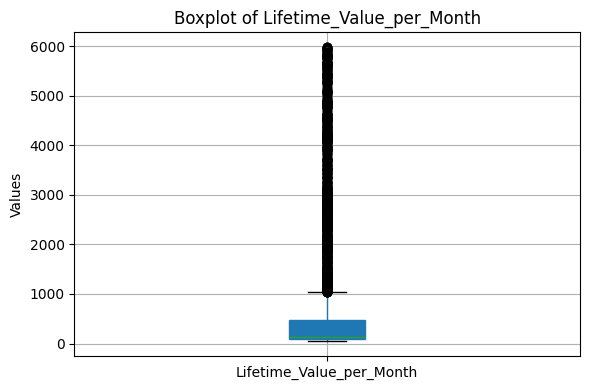

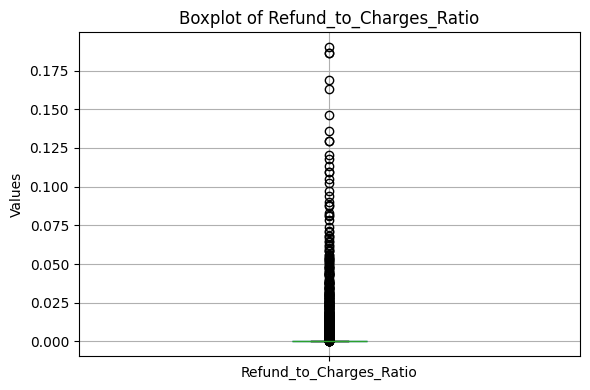

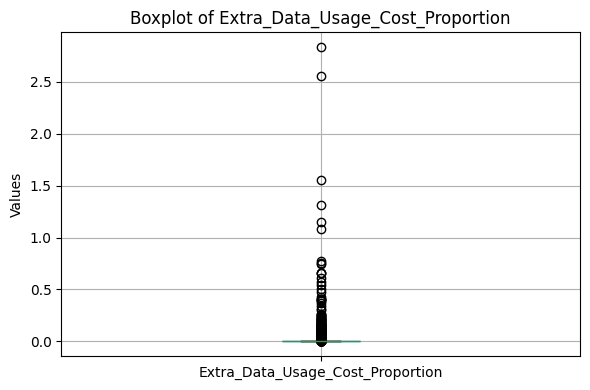

In [20]:
# List of features to plot
selected_features = ['Lifetime_Value_per_Month','Refund_to_Charges_Ratio','Extra_Data_Usage_Cost_Proportion']

# Plot each feature separately
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    X_train.boxplot(column=[feature], showfliers=True, patch_artist=True)
    plt.title(f"Boxplot of {feature}")
    plt.ylabel("Values")
    plt.tight_layout()
    plt.show()

## Outliers Removal

### Outlier Removal for `Lifetime_Value_per_Month`

In [21]:
import pandas as pd

# Calculate IQR for 'Lifetime_Value_per_Month'
Q1_lvm = X_train['Lifetime_Value_per_Month'].quantile(0.25)
Q3_lvm = X_train['Lifetime_Value_per_Month'].quantile(0.75)
IQR_lvm = Q3_lvm - Q1_lvm

# Define bounds for outlier detection
lower_bound_lvm = Q1_lvm - 1.5 * IQR_lvm
upper_bound_lvm = Q3_lvm + 1.5 * IQR_lvm

# Remove outliers
X_train_no_outliers_lvm = X_train[(X_train['Lifetime_Value_per_Month'] >= lower_bound_lvm) &
                                  (X_train['Lifetime_Value_per_Month'] <= upper_bound_lvm)]

# Summary of differences
original_size_lvm = X_train.shape[0]
cleaned_size_lvm = X_train_no_outliers_lvm.shape[0]
removed_count_lvm = original_size_lvm - cleaned_size_lvm

print("Summary for Lifetime_Value_per_Month:")
print(f"Original Dataset Rows: {original_size_lvm}")
print(f"Dataset without Rows with potential outliers: {cleaned_size_lvm}")
print(f"Percentage of outliers: {removed_count_lvm / original_size_lvm * 100:.2f}%")


Summary for Lifetime_Value_per_Month:
Original Dataset Rows: 5634
Dataset without Rows with potential outliers: 4750
Percentage of outliers: 15.69%


We will not delete the potential outliers from the lifetime_value_per_month dataset.
Since 15% of outliers is a significant portion, it is important for the models
to consider these corner cases. Removing such a large percentage of data could lead to 
loss of valuable information and potentially reduce the model's ability to generalize 
to real-world scenarios.

### Outlier Removal for `Refund_to_Charges_Ratio`

In [22]:
import pandas as pd

# Load the dataset
X_train = pd.read_csv('../2_data/X_train.csv')

# Calculate IQR for 'Refund_to_Charges_Ratio'
Q1_rcr = X_train['Refund_to_Charges_Ratio'].quantile(0.25)
Q3_rcr = X_train['Refund_to_Charges_Ratio'].quantile(0.75)
IQR_rcr = Q3_rcr - Q1_rcr

# Define bounds for outlier detection
lower_bound_rcr = Q1_rcr - 1.5 * IQR_rcr
upper_bound_rcr = Q3_rcr + 1.5 * IQR_rcr

# Remove outliers
X_train_no_outliers_rcr = X_train[(X_train['Refund_to_Charges_Ratio'] >= lower_bound_rcr) &
                                  (X_train['Refund_to_Charges_Ratio'] <= upper_bound_rcr)]
# Summary of differences
original_size_rcr = X_train.shape[0]
cleaned_size_rcr = X_train_no_outliers_rcr.shape[0]
removed_count_rcr = original_size_rcr - cleaned_size_rcr

print("Summary for Refund_to_Charges_Ratio:")
print(f"Original Dataset Rows: {original_size_rcr}")
print(f"Dataset Rows without outliers: {cleaned_size_rcr}")
print(f"Outliers: {removed_count_rcr}")
print(f"Percentage on whole dataset: {removed_count_rcr / original_size_rcr * 100:.2f}%")


Summary for Refund_to_Charges_Ratio:
Original Dataset Rows: 5634
Dataset Rows without outliers: 5210
Outliers: 424
Percentage on whole dataset: 7.53%


Again, 7.53% of outliers is a lot and we will keep it, especially since `Refund_to_Charges_Ratio` is a meaningful factor for churn rate.

### Outlier Removal for `Extra_Data_Usage_Cost_Proportion`

In [23]:
# Calculate IQR for 'Extra_Data_Usage_Cost_Proportion'
Q1_edp = X_train['Extra_Data_Usage_Cost_Proportion'].quantile(0.25)
Q3_edp = X_train['Extra_Data_Usage_Cost_Proportion'].quantile(0.75)
IQR_edp = Q3_edp - Q1_edp

# Define bounds for outlier detection
lower_bound_edp = Q1_edp - 1.5 * IQR_edp
upper_bound_edp = Q3_edp + 1.5 * IQR_edp

# Remove outliers
X_train_no_outliers_edp = X_train[(X_train['Extra_Data_Usage_Cost_Proportion'] >= lower_bound_edp) &
                                  (X_train['Extra_Data_Usage_Cost_Proportion'] <= upper_bound_edp)]

# Summary of differences
original_size_edp = X_train.shape[0]
cleaned_size_edp = X_train_no_outliers_edp.shape[0]
removed_count_edp = original_size_edp - cleaned_size_edp

print("Summary for Extra_Data_Usage_Cost_Proportion:")
print(f"Original Dataset Rows: {original_size_edp}")
print(f"Dataset Rows without Outliers: {cleaned_size_edp}")
print(f"Outliers: {removed_count_edp}")
print(f"Percentage of Outliers: {removed_count_edp / original_size_edp * 100:.2f}%")


Summary for Extra_Data_Usage_Cost_Proportion:
Original Dataset Rows: 5634
Dataset Rows without Outliers: 5044
Outliers: 590
Percentage of Outliers: 10.47%


Here, we will also keep the outliers as they are simply corner cases for churn prediction.